## Загрузка, подготовка данных, EDA

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

from catboost import CatBoostClassifier

In [2]:
# Глобальные константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [3]:
df = pd.read_csv("../data/heart_train.csv")

### Предобработка данных <a id="предобработка_данных"></a>

__Создадим функцию для вывода нужных характеристик (head, info, describe, пропуски, дубликаты, уникальные значения)__

In [4]:
def look_data(x):
    print('------------- Исходный датафрейм (5 cтрок) -------------')
    display(x.head())
    print('')
    print('')
    print('------------- Общая информация о датафрейме -------------')
    display(x.info())
    print('')
    print('')
    print('------------- Количество пустых значений в датафрейме -------------')
    display(x.isna().sum())
    print('')
    print('')
    print('------------- Количество явных дубликатов в датафрейме -------------')
    display(x.duplicated().sum())
    print('')
    print('')
    print('------------- Описательная статистика -------------')
    display(x.drop(columns=['id']).describe())
    print('')
    print('')
    print('------------- Проверим уникальные значения колонок -------------')
    display(x.nunique())

In [5]:
# Вывод нужных характеристик (head, info, describe, пропуски, дубликаты, уникальные значения)
look_data(df)

------------- Исходный датафрейм (5 cтрок) -------------


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,...,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,...,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,...,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,...,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047




------------- Общая информация о датафрейме -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problem

None



------------- Количество пустых значений в датафрейме -------------


Unnamed: 0                           0
Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           243
Family History                     243
Smoking                            243
Obesity                            243
Alcohol Consumption                243
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            243
Medication Use                     243
Stress Level                       243
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    243
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                               0
Systolic blood pressure  



------------- Количество явных дубликатов в датафрейме -------------


np.int64(0)



------------- Описательная статистика -------------


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Systolic blood pressure,Diastolic blood pressure
count,8685.000000,8685.000000,8685.000000,8685.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8685.000000,...,8685.000000,8685.000000,8442.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000
mean,4342.000000,0.449958,0.501070,0.050658,0.652097,0.489576,0.902867,0.498342,0.601990,0.503378,...,0.496774,0.505484,3.508292,0.503737,0.346920,0.227339,0.048159,0.036689,0.450295,0.497634
std,2507.287877,0.231174,0.284716,0.023453,0.476333,0.499921,0.296157,0.500027,0.489517,0.284810,...,0.282561,0.286320,2.281772,0.328061,0.476017,0.076635,0.075531,0.060157,0.170184,0.171830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2171.000000,0.258427,0.267857,0.034830,0.000000,0.000000,1.000000,0.000000,0.000000,0.263286,...,0.254190,0.263636,2.000000,0.166667,0.000000,0.227018,0.048229,0.036512,0.303226,0.348837
50%,4342.000000,0.460674,0.499780,0.050412,1.000000,0.000000,1.000000,0.000000,1.000000,0.502110,...,0.494774,0.503603,3.000000,0.500000,0.000000,0.227018,0.048229,0.036512,0.445161,0.500000
75%,6513.000000,0.640449,0.746429,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.748709,...,0.736974,0.750649,6.000000,0.833333,1.000000,0.227018,0.048229,0.036512,0.600000,0.651163
max,8684.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




------------- Проверим уникальные значения колонок -------------


Unnamed: 0                         8685
Age                                  77
Cholesterol                         282
Heart rate                           87
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            7933
Diet                                  4
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            7933
Income                             7808
BMI                                7933
Triglycerides                       772
Physical Activity Days Per Week       8
Sleep Hours Per Day                   8
Heart Attack Risk (Binary)            2
Blood sugar                         239
CK-MB                               679
Troponin                            340
Gender                                4


#### Результаты первичной диагностики (что показала функция)

__1) Размер и типы данных__

* 8685 строк, 28 столбцов.
* Типы: 24 признака `float`, 3 — `int`, 1 — `object` (`Gender`).
* Целевая переменная: `Heart Attack Risk (Binary)` (бинарная).
* Нет повторяющихся 'id'

__2) Дубликаты__

* Явных дубликатов не обнаружено.

__3) Пропуски__

Выявлено по **243 пропуска** в столбцах:

`Diabetes`, `Family History`, `Smoking`, `Obesity`, `Alcohol Consumption`,
`Previous Heart Problems`, `Medication Use`, `Stress Level`, `Physical Activity Days Per Week`.

**Ключевой комментарий:** структура пропусков выглядит **системной**, а не случайной (не “разбросано” по разным колонкам). Необходимо проверить.

__4) В столбце `Gender` 4 уникальных значения:__

In [6]:
df['Gender'].value_counts()

Gender
Male      5882
Female    2560
1.0        156
0.0         87
Name: count, dtype: int64

* корректные: `Male`, `Female`
* подозрительные: `'1.0'`, `'0.0'`

**Вывод:** значения `'1.0'` и `'0.0'` — возможно признак некорректного кодирования/повреждения данных (смешались два формата хранения пола: текстовый и бинарный).

__5) `Unnamed: 0` — технический индекс (не признак), было решено удалить.__

#### Удаление столбца `Unnamed: 0`

In [7]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [8]:
# Проверка
df.head()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,...,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,...,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,...,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,...,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047


#### Проверка пропусков и их связи с Gender

__Сформирован список колонок с пропусками (`cols_na`)__

In [9]:
# столбцы, где есть пустые значения 
cols_na = [
    'Diabetes',
    'Family History',
    'Smoking',
    'Obesity',
    'Alcohol Consumption',
    'Previous Heart Problems',
    'Medication Use',
    'Stress Level',
    'Physical Activity Days Per Week'
]

__Отфильтрованы строки, где:__

* `Gender` ∈ {`'0.0'`, `'1.0'`}
* и **во всех колонках `cols_na` стоят NaN одновременно**

In [10]:
filtered = df[
    df['Gender'].isin(['0.0', '1.0']) & 
    df[cols_na].isna().all(axis=1)
]

In [11]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 16 to 8639
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              243 non-null    float64
 1   Cholesterol                      243 non-null    float64
 2   Heart rate                       243 non-null    float64
 3   Diabetes                         0 non-null      float64
 4   Family History                   0 non-null      float64
 5   Smoking                          0 non-null      float64
 6   Obesity                          0 non-null      float64
 7   Alcohol Consumption              0 non-null      float64
 8   Exercise Hours Per Week          243 non-null    float64
 9   Diet                             243 non-null    int64  
 10  Previous Heart Problems          0 non-null      float64
 11  Medication Use                   0 non-null      float64
 12  Stress Level             

__Распределение Gender в отфильтрованной таблице `filtered`__

In [12]:
filtered['Gender'].value_counts()

Gender
1.0    156
0.0     87
Name: count, dtype: int64

__Результат:__

* в `filtered` **ровно 243 строки** 
* распределение Gender внутри них: `'1.0'` (156), `'0.0'` (87)
* и **во всех этих строках** пропуски появляются сразу в блоке столбцов `cols_na`.

__Дополнительное наблюдение по уникальным значениям в столбах таблицы `filtered`__

In [13]:
filtered.nunique()

Age                                 58
Cholesterol                          1
Heart rate                          63
Diabetes                             0
Family History                       0
Smoking                              0
Obesity                              0
Alcohol Consumption                  0
Exercise Hours Per Week              1
Diet                                 1
Previous Heart Problems              0
Medication Use                       0
Stress Level                         0
Sedentary Hours Per Day              1
Income                               1
BMI                                  1
Triglycerides                        1
Physical Activity Days Per Week      0
Sleep Hours Per Day                  1
Heart Attack Risk (Binary)           1
Blood sugar                        120
CK-MB                              210
Troponin                           103
Gender                               2
Systolic blood pressure             78
Diastolic blood pressure 

__Результат__

В найденных 243 строках многие признаки имеют **1 уникальное значение** (например, Cholesterol, Income, BMI, Exercise Hours Per Week и т.д.).

Это не похоже на реальные измерения, так как не представляется вероятным, что у всех пациентов в данной таблице одинаковые анализы по многим признакам.

**Вывод по проверке пропусков и их связи с `Gender`:** 

Строки, содержащие пропуски и значения `Gender = '0.0' / '1.0'`, связаны не с отсутствием измерений, а с **повреждёнными записями либо ошибкой при формировании (выгрузке) данных**. Данный вывод подтверждается следующими наблюдениями:

* строки с пропусками полностью совпадают со строками, в которых признак пола закодирован бинарными значениями (`'0.0'`, `'1.0'`), тогда как в остальных наблюдениях пол представлен строковыми значениями (`'Male'`, `'Female'`);
* в указанных строках одновременно отсутствует целый блок медицинских и поведенческих признаков;
* данные строки имеют признаки **технической деградации**, поскольку по ряду числовых признаков наблюдаются одинаковые (константные) значения, что указывает на отсутствие реальных измерений.

__В связи с этим данные наблюдения не могут рассматриваться как достоверные и не рекомендуется использовать их при обучении модели.__


__Рекомендуемое действие:__

* удалить 243 строки, где `Gender` в {'0.0','1.0'} и в блоке `cols_na` стоят NaN.

Почему удаление лучше импутации:

* это не “случайные пропуски”, а ошибка формирования строк;
* заполнять такие NaN статистикой — значит “придумывать данные” и рисковать артефактами.

#### Удаление 243 строки, где `Gender` в {'0.0','1.0'} и в блоке `cols_na` стоят `NaN`

In [14]:
df = df.drop(index=filtered.index).reset_index(drop=True)

In [15]:
# проверка
df.isna().sum()

Age                                0
Cholesterol                        0
Heart rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk (Binary)         0
Blood sugar                        0
CK-MB                              0
Troponin                           0
Gender                             0
Systolic blood pressure            0
Diastolic blood pressure           0
id                                 0
d

#### Анализ уникальных значений в столбцах

__Вывод количества уникальных значений по столбцам__

In [16]:
df.nunique()

Age                                  73
Cholesterol                         281
Heart rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            7932
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            7932
Income                             7807
BMI                                7932
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Heart Attack Risk (Binary)            2
Blood sugar                         224
CK-MB                               588
Troponin                            298
Gender                                2
Systolic blood pressure              91


__Бинарные числовые столбцы__

In [17]:
numeric_binary = [
    'Diabetes',
    'Family History',
    'Smoking',
    'Obesity',
    'Alcohol Consumption',
    'Previous Heart Problems',
    'Medication Use',
    'Heart Attack Risk (Binary)'
]

In [18]:
df[numeric_binary].apply(pd.Series.unique)

,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Medication Use,Heart Attack Risk (Binary)
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


__Все признаки содержат ровно два значения: 0.0 и 1.0__
- Это корректное и ожидаемое поведение для медицинских и поведенческих признаков

- Признаки уже находятся в числовом формате и не требуют кодирования.

- Их можно напрямую использовать в моделях машинного обучения.

__Проверка возможных дискретных признаков__

__Diet__

In [19]:
df['Diet'].unique()

array([1, 2, 0])

- Всего 3 уникальных значения.

- Вероятнее всего, это категориальный или порядковый признак (например, тип диеты).

__Stress Level__

In [20]:
df['Stress Level'].unique()

array([ 8.,  9.,  6.,  3.,  7.,  1., 10.,  2.,  5.,  4.])

- Скорее всего, шкала уровня стресса (1–10).

__Physical Activity Days Per Week__

In [21]:
df['Physical Activity Days Per Week'].unique()

array([3., 2., 0., 5., 6., 4., 7., 1.])

- 8 уникальных значений.

- Вероятно интерпретируется как количество дней активности в неделю.

__Sleep Hours Per Day__

In [22]:
df['Sleep Hours Per Day'].unique()

array([0.33333333, 0.83333333, 1.        , 0.        , 0.16666667,
       0.66666667, 0.5       ])

- Значения выглядят как дискретизация/нормализация (доли от суток)

__Подозрительные совпадения__

- Следующие признаки имеют одинаковое количество уникальных значений (7932):

    - Exercise Hours Per Week

    - Sedentary Hours Per Day

    - BMI
 
- Что проверить:

    - корреляции между этими полями

### Исследовательский анализ данных <a id="исследовательский_анализ_данных"></a>

__Создадим вспомогательную функции для EDA__

__Разделение признаков на continuous / discrete / category:__

__Сategory признаки__
- __Gender__ — бинарная категория (Male / Female)

- __Diet__ — 3 категории (0 / 1 / 2), не непрерывная величина

In [23]:
category = [
    'Gender',
    'Diet'
]

__Дискретные числовые признаки__

Это признаки:

 - принимающие ограниченный набор целых или дискретных значений,

 - имеющие количественный смысл,

 - но не являющиеся непрерывными.

In [24]:
# дискретные числовые признаки
discrete = [
    'Stress Level',
    'Physical Activity Days Per Week',
    'Sleep Hours Per Day'
]

__Непрерывные числовые признаки__

Все остальные числовые признаки, которые:

    - имеют большой диапазон значений,

    - либо являются нормализованными непрерывными величинами,

    - либо представляют измерения.

In [25]:
# непрерывные числовые признаки
continuous = [
    'Age',
    'Cholesterol',
    'Heart rate',
    'Exercise Hours Per Week',
    'Sedentary Hours Per Day',
    'Income',
    'BMI',
    'Triglycerides',
    'Blood sugar',
    'CK-MB',
    'Troponin',
    'Systolic blood pressure',
    'Diastolic blood pressure'
]

__Также есть бинарные признаки (таргет Heart Attack Risk (Binary) туда не включаем)__

In [26]:
binary = [
    'Diabetes',
    'Family History',
    'Smoking',
    'Obesity',
    'Alcohol Consumption',
    'Previous Heart Problems',
    'Medication Use'
]

In [27]:
label_dict = {
    # непрерывные числовые признаки
    'Age': [
        "Распределение возраста пациентов",
        "Нормализованный возраст",
        "Количество наблюдений"
    ],
    'Cholesterol': [
        "Распределение уровня холестерина",
        "Нормализованный уровень холестерина",
        "Количество наблюдений"
    ],
    'Heart rate': [
        "Распределение частоты сердечных сокращений",
        "Нормализованная ЧСС",
        "Количество наблюдений"
    ],
    'Exercise Hours Per Week': [
        "Распределение часов физической активности в неделю",
        "Нормализованные часы активности",
        "Количество наблюдений"
    ],
    'Sedentary Hours Per Day': [
        "Распределение сидячего времени в день",
        "Нормализованные часы сидячей активности",
        "Количество наблюдений"
    ],
    'Income': [
        "Распределение уровня дохода",
        "Нормализованный доход",
        "Количество наблюдений"
    ],
    'BMI': [
        "Распределение индекса массы тела (BMI)",
        "Нормализованный BMI",
        "Количество наблюдений"
    ],
    'Triglycerides': [
        "Распределение уровня триглицеридов",
        "Нормализованный уровень триглицеридов",
        "Количество наблюдений"
    ],
    'Blood sugar': [
        "Распределение уровня сахара в крови",
        "Нормализованный уровень сахара",
        "Количество наблюдений"
    ],
    'CK-MB': [
        "Распределение уровня CK-MB",
        "Нормализованный уровень CK-MB",
        "Количество наблюдений"
    ],
    'Troponin': [
        "Распределение уровня тропонина",
        "Нормализованный уровень тропонина",
        "Количество наблюдений"
    ],
    'Systolic blood pressure': [
        "Распределение систолического давления",
        "Нормализованное систолическое давление",
        "Количество наблюдений"
    ],
    'Diastolic blood pressure': [
        "Распределение диастолического давления",
        "Нормализованное диастолическое давление",
        "Количество наблюдений"
    ],

    # дискретные числовые
    'Stress Level': [
        "Распределение уровня стресса",
        "Уровень стресса",
        "Количество наблюдений"
    ],
    'Physical Activity Days Per Week': [
        "Распределение дней физической активности в неделю",
        "Количество дней",
        "Количество наблюдений"
    ],
    'Sleep Hours Per Day': [
        "Распределение продолжительности сна",
        "Продолжительность сна (нормализованная)",
        "Количество наблюдений"
    ],

    # категориальные
    'Gender': [
        "Распределение пола пациентов",
        "Пол",
        "Количество наблюдений"
    ],
    'Diet': [
        "Распределение типов диеты",
        "Тип диеты",
        "Количество наблюдений"
    ],

    # бинарные
    'Diabetes': [
        "Распределение наличия диабета",
        "Диабет (0 — нет, 1 — да)",
        "Количество наблюдений"
    ],
    'Family History': [
        "Распределение семейного анамнеза",
        "Семейный анамнез (0 — нет, 1 — да)",
        "Количество наблюдений"
    ],
    'Smoking': [
        "Распределение статуса курения",
        "Курение (0 — нет, 1 — да)",
        "Количество наблюдений"
    ],
    'Obesity': [
        "Распределение наличия ожирения",
        "Ожирение (0 — нет, 1 — да)",
        "Количество наблюдений"
    ],
    'Alcohol Consumption': [
        "Распределение потребления алкоголя",
        "Алкоголь (0 — нет, 1 — да)",
        "Количество наблюдений"
    ],
    'Previous Heart Problems': [
        "Распределение предыдущих сердечных проблем",
        "Предыдущие проблемы (0 — нет, 1 — да)",
        "Количество наблюдений"
    ],
    'Medication Use': [
        "Распределение приёма медикаментов",
        "Приём медикаментов (0 — нет, 1 — да)",
        "Количество наблюдений"
    ],
    'Heart Attack Risk (Binary)': [
        "Распределение риска сердечного приступа",
        "Риск (0 — низкий, 1 — высокий)",
        "Количество наблюдений"
    ]
}

__Функция для EDA__

In [28]:
def learn_data(df):
    def get_labels(col):
        vals = label_dict.get(col, None)
        if vals is None:
            return [f"Распределение: {col}", col, "Количество наблюдений"]
        vals = list(vals) + [""] * (3 - len(vals))
        return vals[:3]

    for col in df.columns:
        if col == 'id':
            continue

        print(f"\n==== {col} ==== \n")
        title, xlabel, ylabel = get_labels(col)

        # Бинарные
        if col in binary:

            # bar chart (0/1 + NaN если есть)
            plt.figure(figsize=(6, 4))
            df[col].value_counts(dropna=False).sort_index().plot(
                kind="bar", grid=True
            )
            plt.title(title if title else f"Распределение: {col}")
            plt.xlabel(xlabel if xlabel else col)
            plt.ylabel(ylabel if ylabel else "Количество наблюдений")
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()

            # pie chart
            counts = df[col].value_counts(dropna=False).sort_index()
            plt.figure(figsize=(5, 5))
            plt.pie(
                counts,
                labels=counts.index,
                autopct='%1.1f%%',
                startangle=90,
                counterclock=False,
                wedgeprops={'edgecolor': 'white'}
            )
            pie_title = f"Доля классов — {xlabel}" if xlabel else f"Доля классов: {col}"
            plt.title(pie_title)
            plt.tight_layout()
            plt.show()

        # Непрерывные
        elif col in continuous:
            print(df[col].describe(), "\n")

            # Гистограмма
            plt.figure(figsize=(6, 4))
            plt.hist(df[col].dropna(), bins=50)
            plt.title(title if title else f"Гистограмма: {col}")
            plt.xlabel(xlabel if xlabel else col)
            plt.ylabel(ylabel if ylabel else "Количество наблюдений")
            plt.tight_layout()
            plt.show()

            # Boxplot
            plt.figure(figsize=(4, 6))
            plt.boxplot(df[col].dropna(), vert=True, showmeans=True)
            plt.title(f"Boxplot: {col}")
            plt.ylabel(xlabel if xlabel else col)
            plt.tight_layout()
            plt.show()

        # Дискретные
        elif col in discrete:
            print(df[col].describe(), "\n")

            # bar chart
            plt.figure(figsize=(6, 4))
            df[col].value_counts(dropna=False).sort_index().plot(
                kind="bar", grid=True
            )
            plt.title(title if title else f"Распределение: {col}")
            plt.xlabel(xlabel if xlabel else col)
            plt.ylabel(ylabel if ylabel else "Количество наблюдений")
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()

        # Категориальные
        elif col in category:
            print(df[col].describe(), "\n")

            # bar chart
            counts = df[col].value_counts(dropna=False)
            plt.figure(figsize=(6, 4))
            counts.plot(kind="bar")
            plt.title(title if title else f"Распределение: {col}")
            plt.xlabel(xlabel if xlabel else col)
            plt.ylabel(ylabel if ylabel else "Количество наблюдений")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

            # pie chart
            plt.figure(figsize=(5, 5))
            plt.pie(
                counts,
                labels=counts.index,
                autopct='%1.1f%%',
                startangle=90,
                counterclock=False,
                wedgeprops={'edgecolor': 'white'}
            )
            pie_title = f"Доля категорий — {xlabel}" if xlabel else f"Доля категорий: {col}"
            plt.title(pie_title)
            plt.tight_layout()
            plt.show()

        else:
            # Фоллбэк для непомеченных колонок
            print(df[col].describe(), "\n")
            counts = df[col].value_counts(dropna=False)

            # bar chart
            plt.figure(figsize=(6, 4))
            counts.plot(kind="bar")
            plt.title(title if title else f"Распределение: {col}")
            plt.xlabel(xlabel if xlabel else col)
            plt.ylabel(ylabel if ylabel else "Количество наблюдений")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()



==== Age ==== 

count    8442.000000
mean        0.449008
std         0.232809
min         0.044944
25%         0.247191
50%         0.460674
75%         0.640449
max         0.853933
Name: Age, dtype: float64 



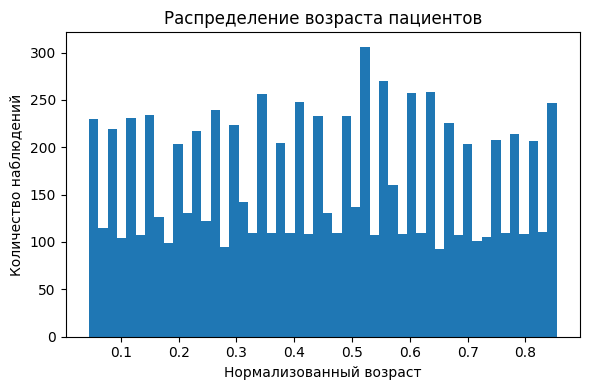

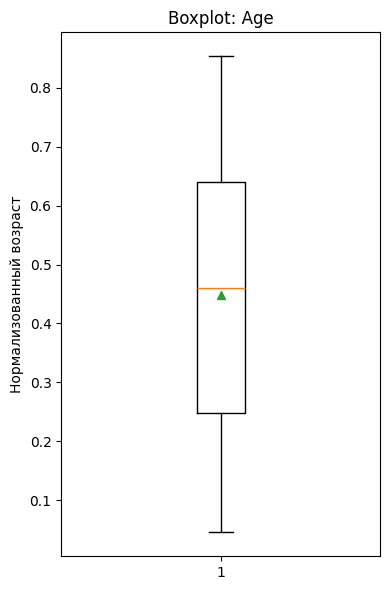


==== Cholesterol ==== 

count    8442.000000
mean        0.501108
std         0.288785
min         0.000000
25%         0.260714
50%         0.496429
75%         0.750000
max         1.000000
Name: Cholesterol, dtype: float64 



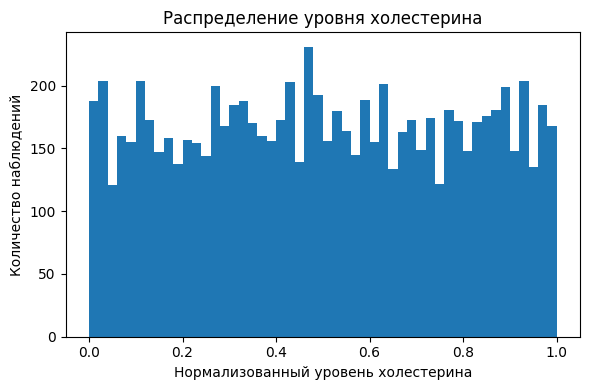

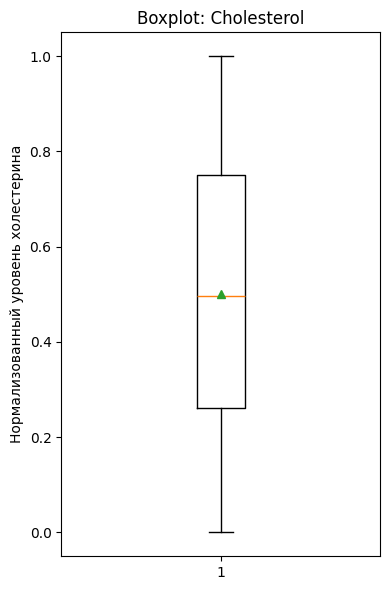


==== Heart rate ==== 

count    8442.000000
mean        0.050194
std         0.018442
min         0.018332
25%         0.034830
50%         0.050412
75%         0.065995
max         0.082493
Name: Heart rate, dtype: float64 



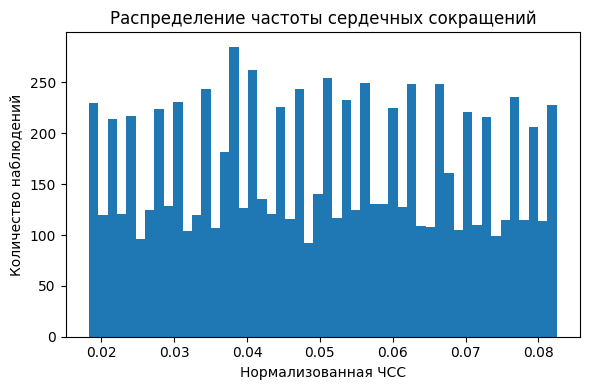

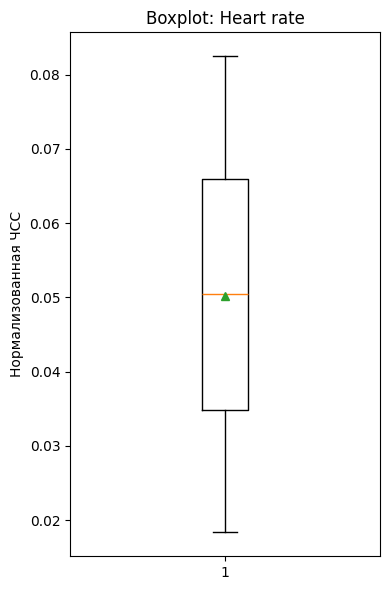


==== Diabetes ==== 



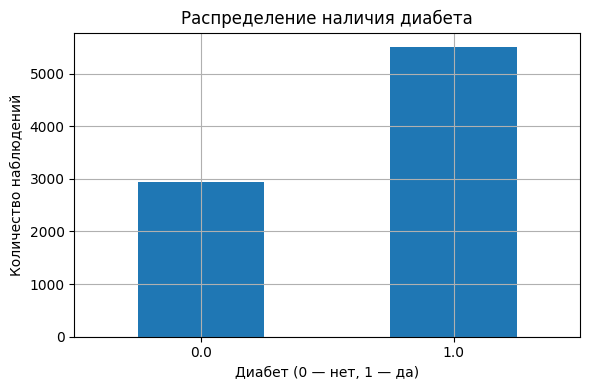

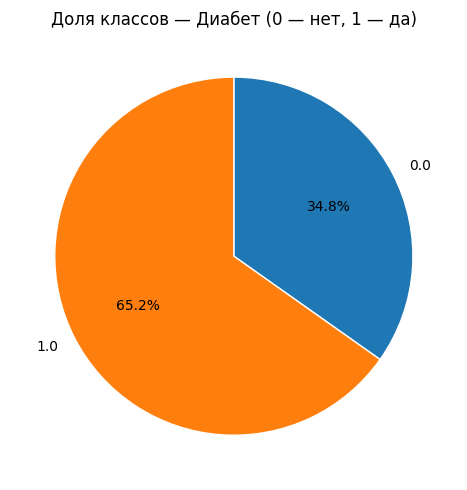


==== Family History ==== 



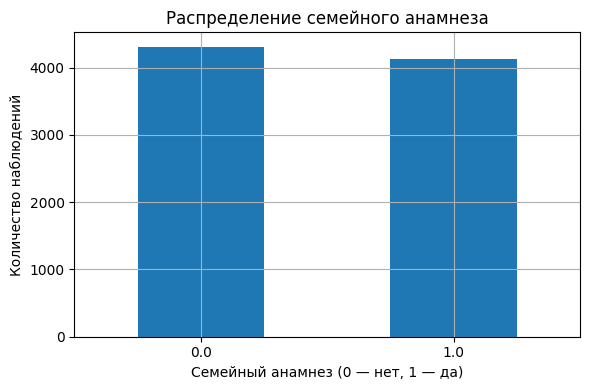

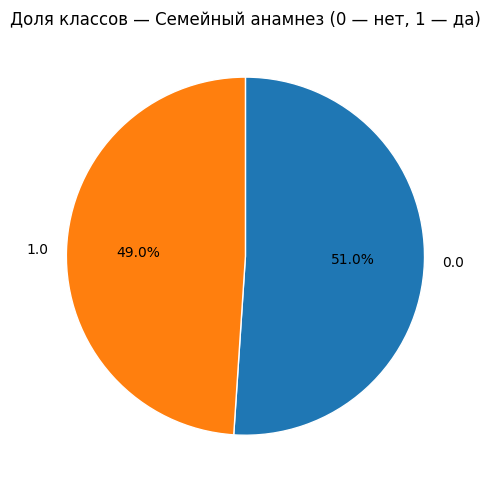


==== Smoking ==== 



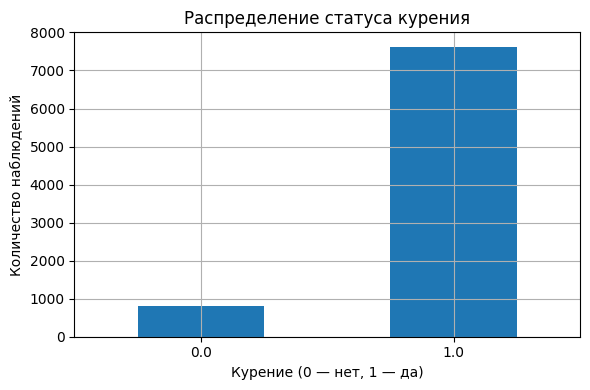

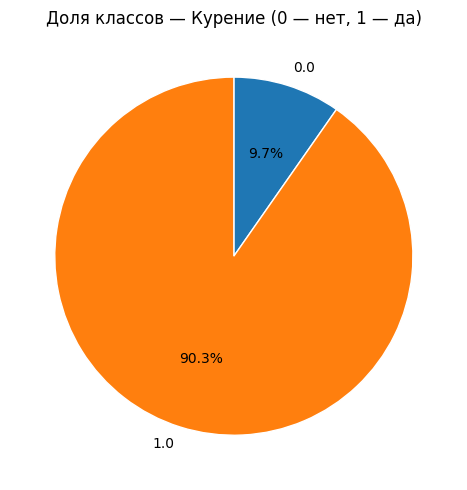


==== Obesity ==== 



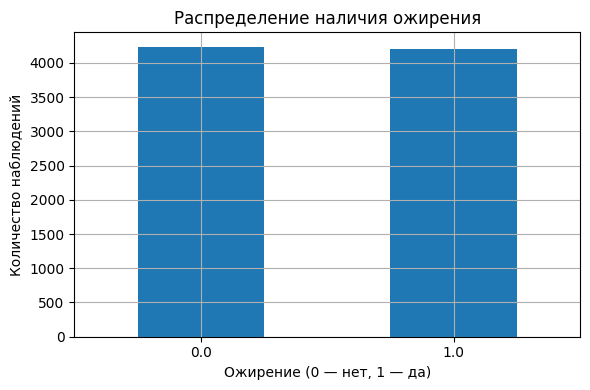

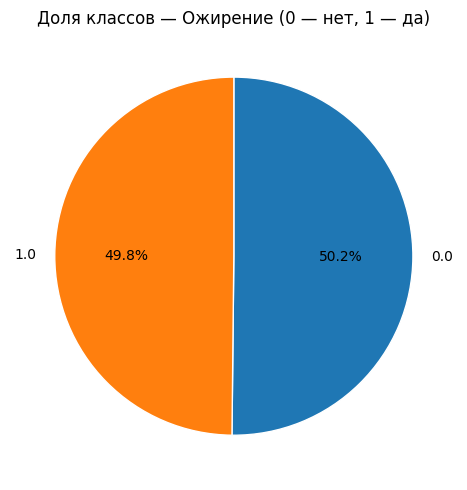


==== Alcohol Consumption ==== 



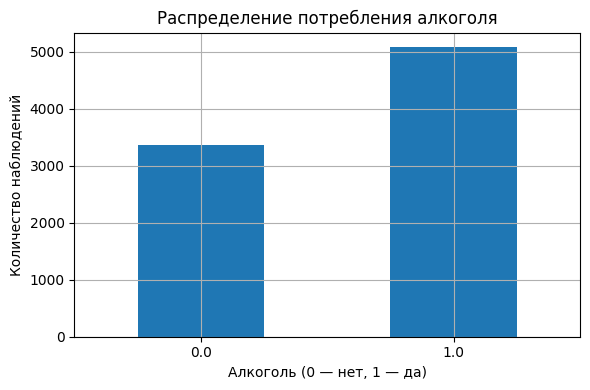

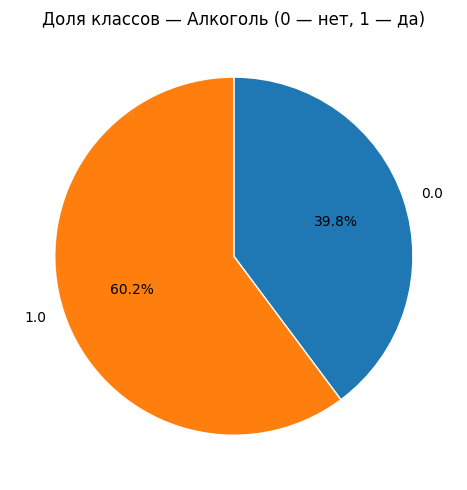


==== Exercise Hours Per Week ==== 

count    8442.000000
mean        0.503415
std         0.288881
min         0.000000
25%         0.253359
50%         0.508244
75%         0.754901
max         1.000000
Name: Exercise Hours Per Week, dtype: float64 



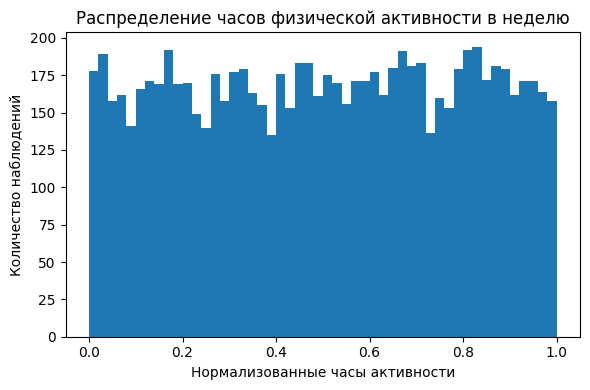

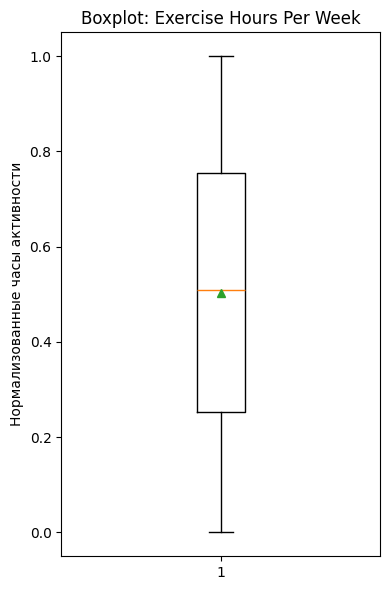


==== Diet ==== 

count    8442.000000
mean        1.001540
std         0.812981
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Diet, dtype: float64 



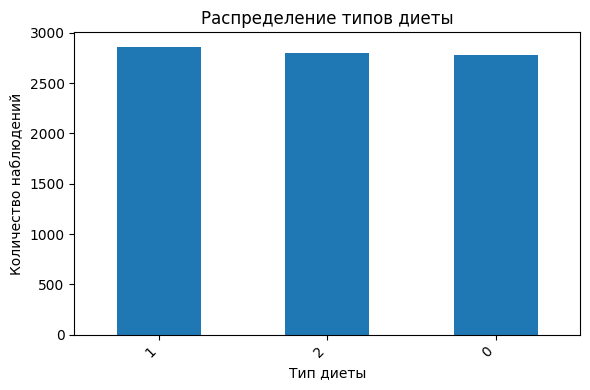

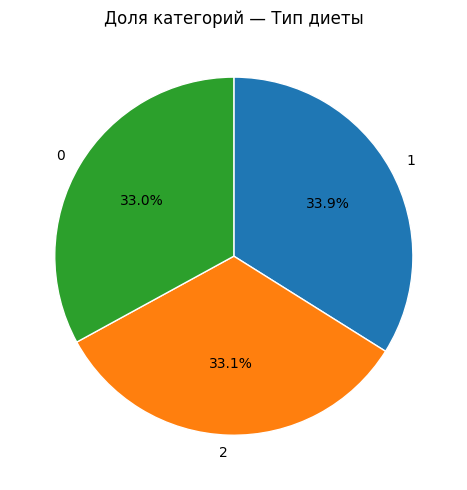


==== Previous Heart Problems ==== 



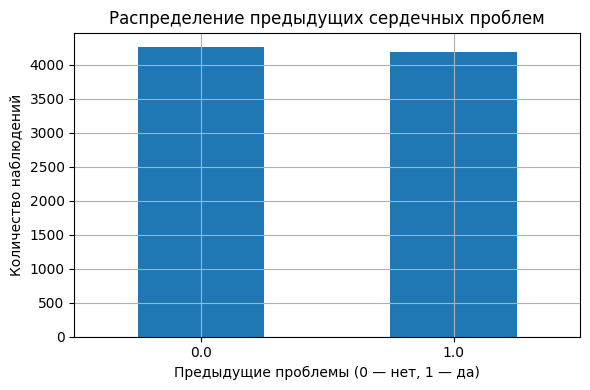

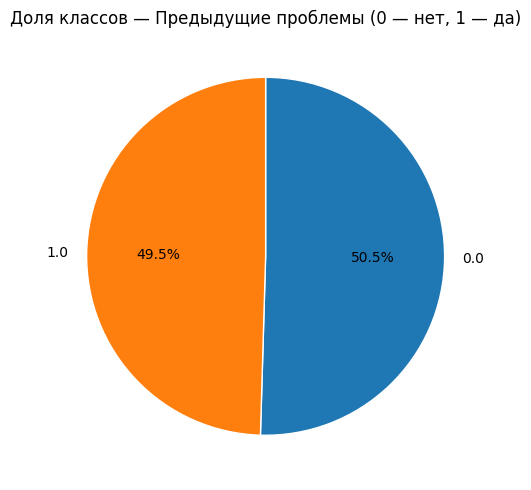


==== Medication Use ==== 



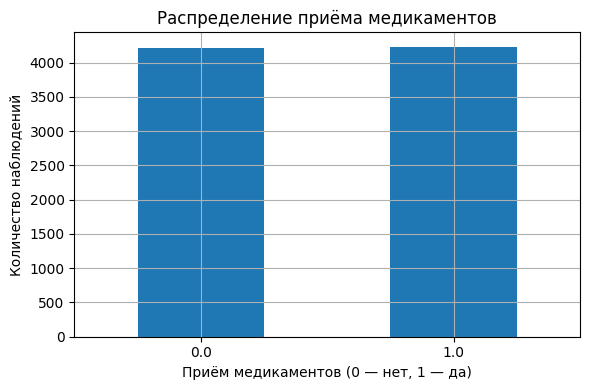

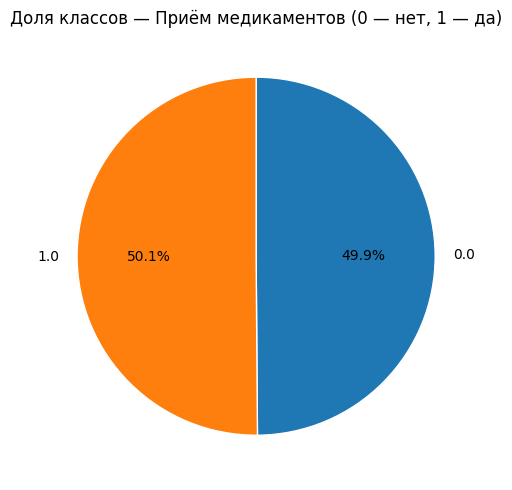


==== Stress Level ==== 

count    8442.000000
mean        5.493367
std         2.867862
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Stress Level, dtype: float64 



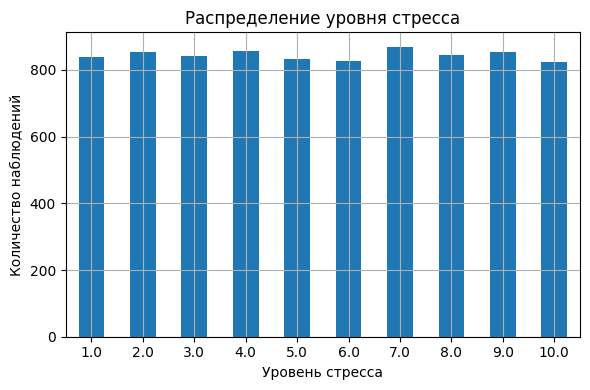


==== Sedentary Hours Per Day ==== 

count    8442.000000
mean        0.499142
std         0.289418
min         0.000000
25%         0.247650
50%         0.492734
75%         0.751047
max         1.000000
Name: Sedentary Hours Per Day, dtype: float64 



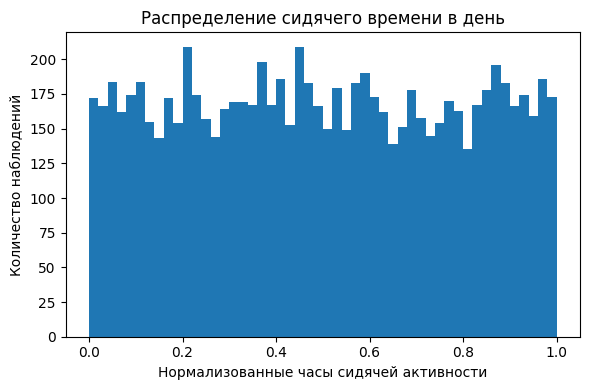

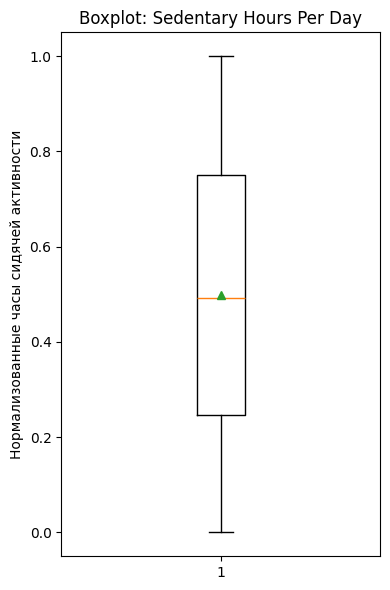


==== Income ==== 

count    8442.000000
mean        0.496089
std         0.288767
min         0.000000
25%         0.244591
50%         0.496052
75%         0.747603
max         1.000000
Name: Income, dtype: float64 



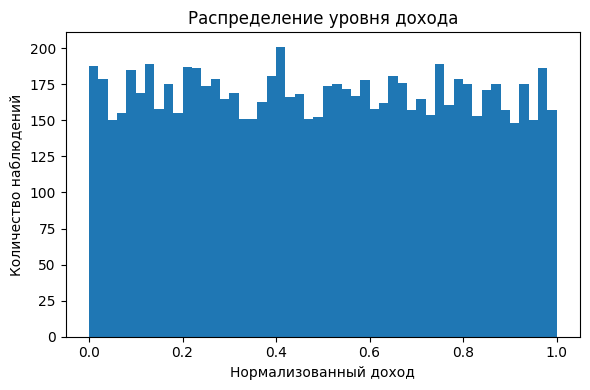

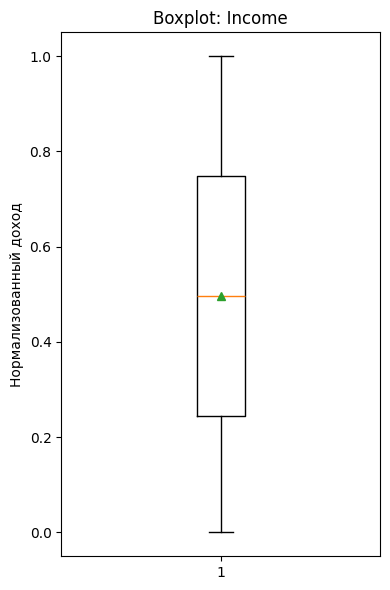


==== BMI ==== 

count    8442.000000
mean        0.496831
std         0.286599
min         0.000000
25%         0.247935
50%         0.490801
75%         0.744399
max         1.000000
Name: BMI, dtype: float64 



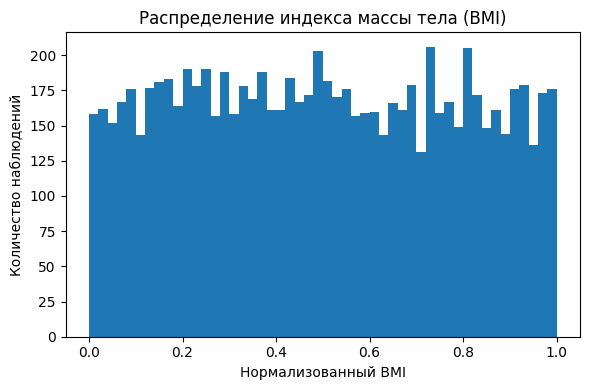

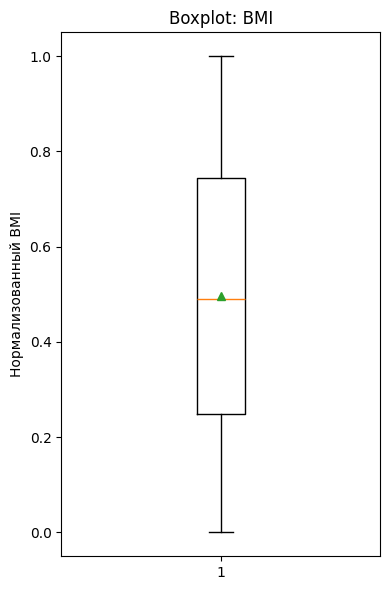


==== Triglycerides ==== 

count    8442.000000
mean        0.505539
std         0.290412
min         0.000000
25%         0.257143
50%         0.507792
75%         0.758442
max         1.000000
Name: Triglycerides, dtype: float64 



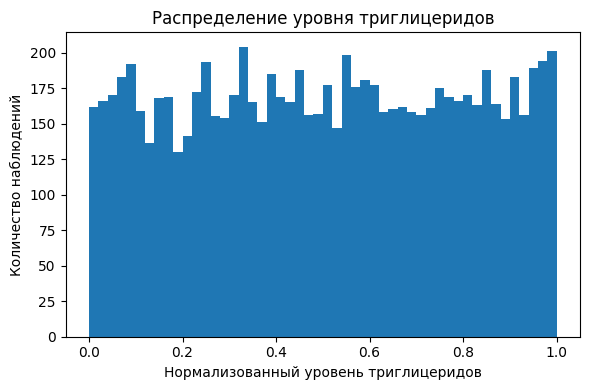

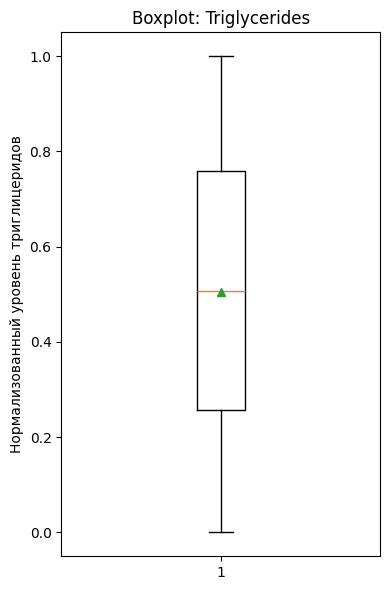


==== Physical Activity Days Per Week ==== 

count    8442.000000
mean        3.508292
std         2.281772
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max         7.000000
Name: Physical Activity Days Per Week, dtype: float64 



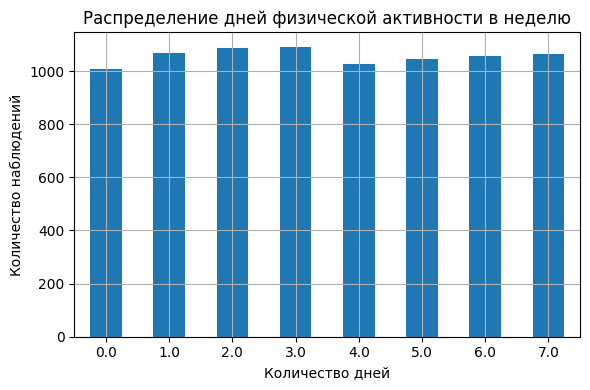


==== Sleep Hours Per Day ==== 

count    8442.000000
mean        0.503712
std         0.332749
min         0.000000
25%         0.166667
50%         0.500000
75%         0.833333
max         1.000000
Name: Sleep Hours Per Day, dtype: float64 



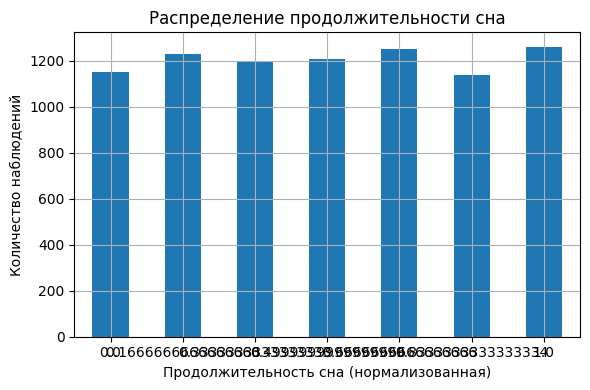


==== Heart Attack Risk (Binary) ==== 

count    8442.000000
mean        0.356906
std         0.479115
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Heart Attack Risk (Binary), dtype: float64 



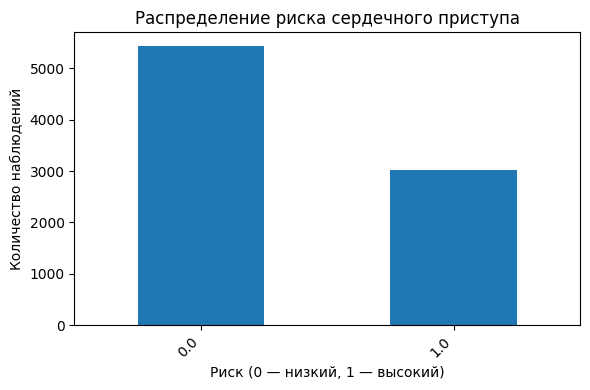


==== Blood sugar ==== 

count    8442.000000
mean        0.227998
std         0.074623
min         0.000000
25%         0.227018
50%         0.227018
75%         0.227018
max         1.000000
Name: Blood sugar, dtype: float64 



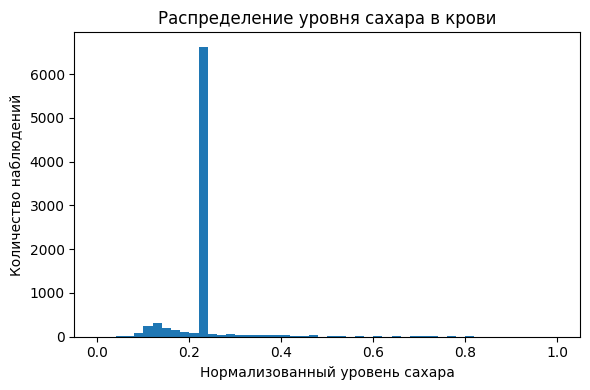

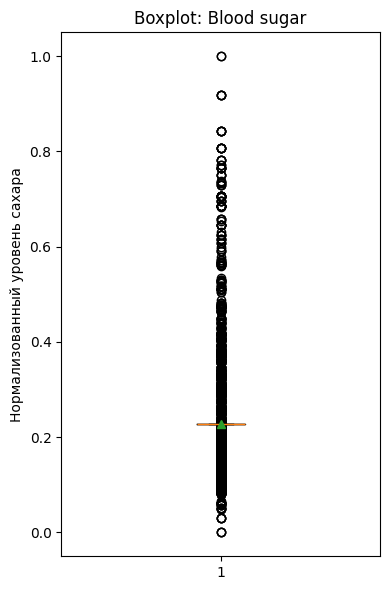


==== CK-MB ==== 

count    8442.000000
mean        0.047745
std         0.070399
min         0.000000
25%         0.048229
50%         0.048229
75%         0.048229
max         1.000000
Name: CK-MB, dtype: float64 



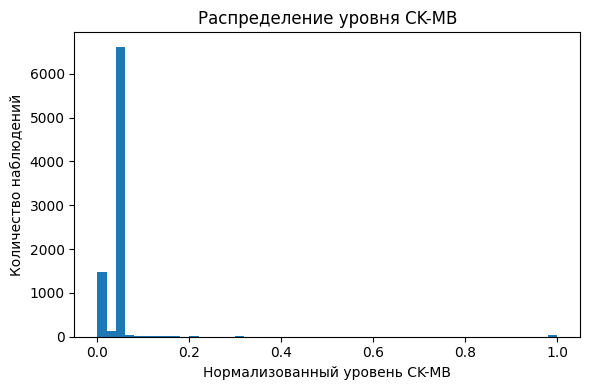

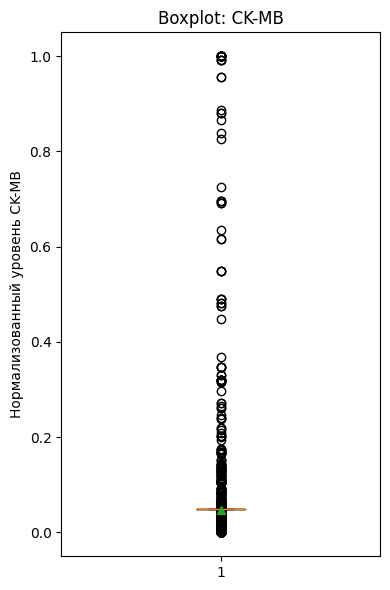


==== Troponin ==== 

count    8442.000000
mean        0.036867
std         0.059284
min         0.000000
25%         0.036512
50%         0.036512
75%         0.036512
max         1.000000
Name: Troponin, dtype: float64 



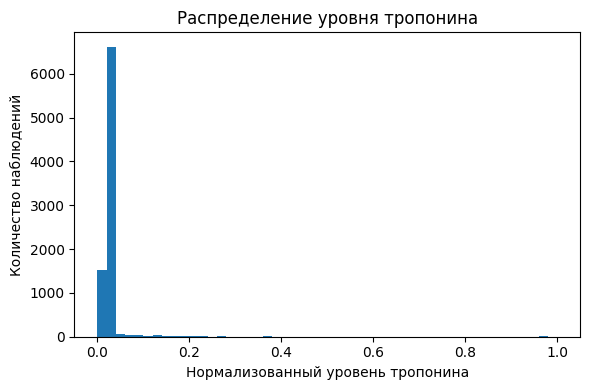

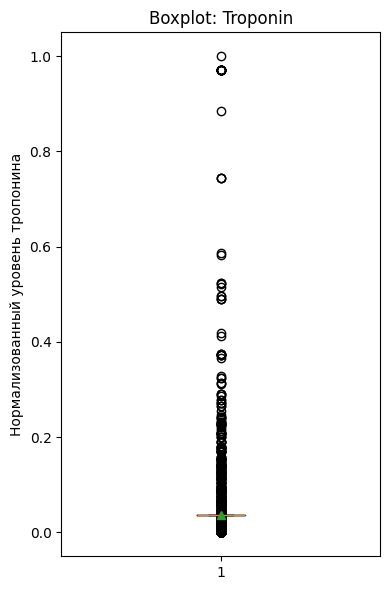


==== Gender ==== 

count     8442
unique       2
top       Male
freq      5882
Name: Gender, dtype: object 



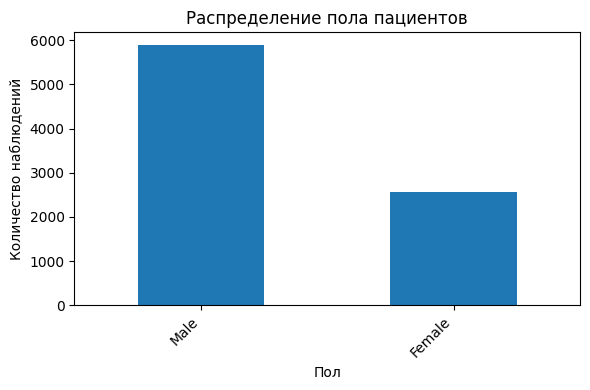

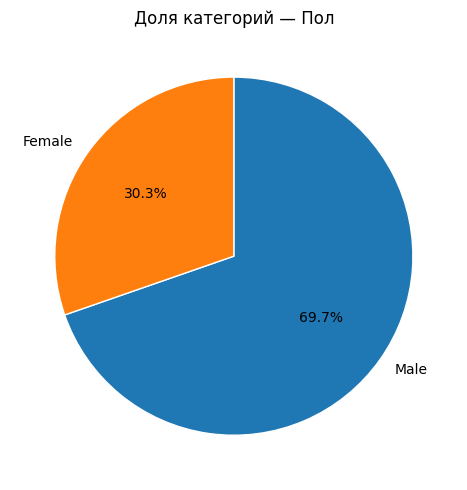


==== Systolic blood pressure ==== 

count    8442.000000
mean        0.451955
std         0.170187
min         0.161290
25%         0.303226
50%         0.451613
75%         0.600000
max         0.741935
Name: Systolic blood pressure, dtype: float64 



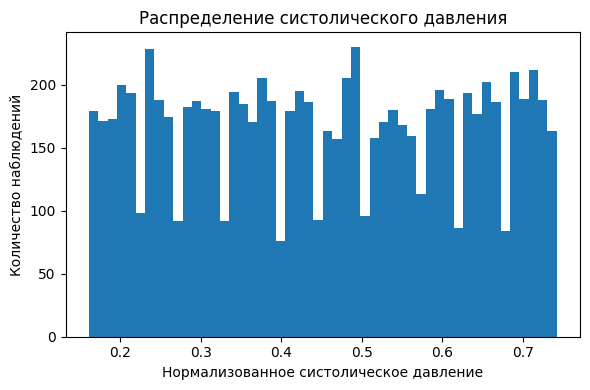

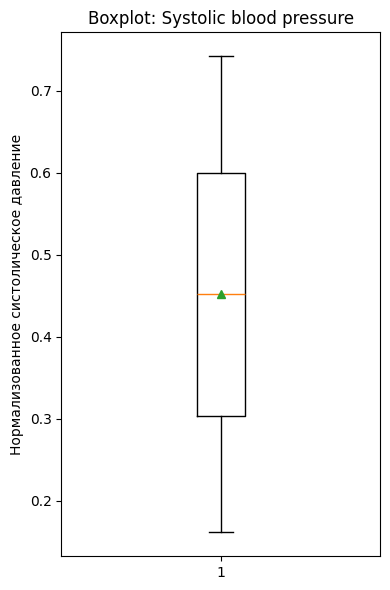


==== Diastolic blood pressure ==== 

count    8442.000000
mean        0.501672
std         0.170302
min         0.209302
25%         0.348837
50%         0.500000
75%         0.651163
max         0.790698
Name: Diastolic blood pressure, dtype: float64 



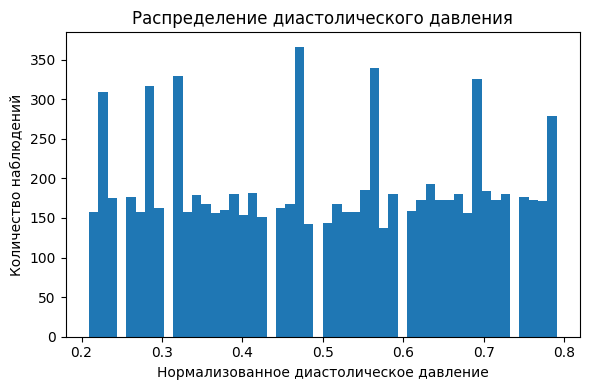

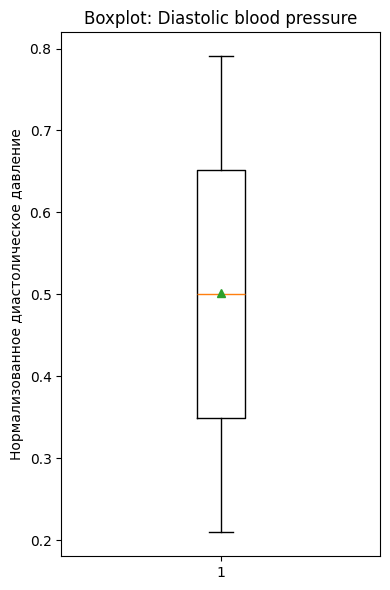

In [29]:
learn_data(df)

#### Выводы по анализу распределений признаков

- __Age (Возраст)__

Возраст также представлен в нормализованной шкале.

Распределение близко к симметричному, медиана (≈ 0.46) и среднее (≈ 0.45) практически совпадают.

По гистограмме видно, что данные равномерно покрывают диапазон значений, без концентрации в крайних областях.

Boxplot не выявляет экстремальных выбросов.

__Вывод:__
Признак Age корректно представлен, не содержит аномальных значений и адекватно отражает вариативность возраста в выборке.

- __Cholesterol (Уровень холестерина)__

Значения распределены по всему диапазону [0, 1], что подтверждает предварительную нормализацию.

Среднее и медиана близки (mean ≈ 0.50, median ≈ 0.50), распределение близко к равномерному.

Boxplot показывает широкий интерквартильный размах, что говорит о высокой вариативности признака.

Явных выбросов не обнаружено.

__Вывод:__
Cholesterol является информативным непрерывным признаком с хорошей вариативностью.

- __Heart rate (Частота сердечных сокращений)__

Признак представлен в нормализованном виде (значения в узком диапазоне ~0.018–0.082).

Среднее значение (mean ≈ 0.051) практически совпадает с медианой (median ≈ 0.050), что указывает на симметричное распределение.

По гистограмме распределение выглядит достаточно равномерным, без выраженной асимметрии.

Boxplot не показывает ярко выраженных выбросов — экстремальные значения находятся в разумных пределах.

__Вывод:__
Признак Heart rate стабилен, не содержит аномалий и выбросов

- __Diabetes (Диабет)__

Бинарный признак.

Наблюдается умеренный дисбаланс:

~65% — диабет есть,

~35% — диабета нет.

__Вывод:__
Признак информативен, однако имеет перекос в сторону положительного класса. При интерпретации результатов модели следует учитывать это распределение.

- __Family History (Семейный анамнез)__

Бинарный признак.

Классы распределены почти равномерно:

~51% — нет,

~49% — да.

__Вывод:__
Family History является сбалансированным и потенциально важным медицинским фактором риска. Может быть использован напрямую.

- __Smoking (Курение)__

Бинарный признак.

Сильный дисбаланс классов:

≈ 90% — курят,

≈ 10% — не курят.

__Вывод:__
Признак имеет выраженный дисбаланс, что может снизить его вклад в модели или привести к смещённой интерпретации. При обучении моделей стоит учитывать дисбаланс (например, через class_weight или регуляризацию).

- __Obesity (Ожирение)__

Бинарный признак.

Распределение почти идеально сбалансировано:

≈ 50% — есть ожирение,

≈ 50% — нет.

__Вывод:__
Obesity — качественный бинарный признак без смещения классов. Подходит для всех типов моделей без дополнительных корректировок.

- __Alcohol Consumption (Потребление алкоголя)__

Бинарный признак: 0 — нет, 1 — да.

Наблюдается умеренный дисбаланс:

~60% — употребляют алкоголь,

~40% — не употребляют.

__Вывод:__
Признак информативен и корректен. Дисбаланс не является критичным, но может быть учтён при анализе влияния признаков и интерпретации модели.

- __Exercise Hours Per Week (Часы физической активности)__

Признак представлен в нормализованном виде.

Среднее и медиана близки (≈ 0.50), распределение симметричное.

Boxplot не показывает выбросов.

Распределение значений равномерное по всему диапазону.

__Вывод:__
Exercise Hours Per Week — устойчивый непрерывный признак с высокой вариативностью, не содержащий аномалий. Подходит для использования в моделях без дополнительной очистки.

- __Diet (Тип диеты)__

Признак принимает 3 категории: 0, 1, 2.

Распределение категорий практически равномерное:

каждая категория ≈ 33%.

Явного дисбаланса классов не наблюдается.

__Вывод:__
Признак Diet является корректным категориальным признаком без перекоса в одну из категорий. Может быть использован в модели без дополнительных методов балансировки.

- __Previous Heart Problems (Предыдущие сердечные проблемы)__

Бинарный признак.

Распределение практически симметрично:

~50% — были,

~50% — не было.

__Вывод:__
Признак сбалансирован и, с медицинской точки зрения, является одним из наиболее значимых факторов риска. Особенно важно проверить его влияние на целевую переменную.

- __Medication Use (приём медикаментов)__

Бинарный признак (0 — нет, 1 — да).

Классы распределены почти идеально сбалансировано: ~50% / 50%.

Признак не содержит пропусков и аномалий.

__Вывод:__
Medication Use — корректный, хорошо сбалансированный бинарный признак. Может напрямую использоваться в моделях, риск смещения минимален.

- __Stress Level (уровень стресса)__

Дискретный признак со значениями от 1 до 10.

Частоты по уровням примерно одинаковы.

Отсутствует перекос в сторону низких или высоких значений.

__Вывод:__
Stress Level — хорошо сбалансированный признак. Подходит для использования как числовой или порядковый.

- __Sedentary Hours Per Day (сидячее время)__

Непрерывный нормализованный признак.

Среднее ≈ медиане, распределение симметричное.

Выбросов не обнаружено.

__Вывод:__
Признак корректен, логично дополняет физическую активность и может быть информативен в сочетании с ней.

- __Income (доход)__

Нормализованный числовой признак с широким диапазоном значений.

Распределение близко к равномерному.

Boxplot не выявляет выбросов.

__Вывод:__
Может быть использован напрямую, но его интерпретируемость ограничена.

- __BMI (индекс массы тела)__

Нормализованный непрерывный признак.

Среднее и медиана близки (≈ 0.50), распределение симметричное.

Отсутствуют выбросы и аномальные значения.

__Вывод:__
BMI корректно представлен, не вызывает подозрений и является потенциально важным медицинским фактором риска.

- __Triglycerides (триглицериды)__

Непрерывный признак в нормализованном диапазоне [0, 1].

Распределение равномерное, без выраженной асимметрии.

Boxplot не показывает экстремальных выбросов.

__Вывод:__
Triglycerides — стабильный непрерывный признак с хорошей вариативностью.

- __Physical Activity Days Per Week (дни активности в неделю)__

Дискретный признак со значениями от 0 до 7.

Распределение почти равномерное по всем дням недели.

Среднее значение ≈ 3.5 дня, медиана = 3.

__Вывод:__
Признак хорошо сбалансирован, не требует трансформаций. Подходит для использования как числовой дискретный признак.

- __Sleep Hours Per Day (продолжительность сна)__

Признак представлен дискретными нормализованными значениями, соответствующими фиксированным часам сна.

Распределение близко к равномерному, без явного перекоса.

Среднее ≈ медиане (≈ 0.50), выбросы отсутствуют.

__Вывод:__
Sleep Hours Per Day — корректный числовой признак с ограниченным числом значений.

- __Blood Sugar (уровень сахара в крови)__

    - Наблюдения:

        - Явный пик в одной точке (около 0.23 в нормализованной шкале).

        - Значения ниже и выше этого уровня встречаются значительно реже.

    - Boxplot и статистический анализ:

        - медиана, Q1 и Q3 совпадают

        - длинный хвост высоких значений с большим числом выбросов.

Интерпретация:

- Большая часть наблюдений фактически несёт одинаковую информацию.

- Возможна зависимость от признака Diabetes.

__Вывод:__
Blood sugar в текущем виде имеет ограниченную информативность как непрерывный признак.

- __CK-MB (креатинкиназа-MB)__

    - Наблюдения:

        - Распределение резко скошено вправо.

        - Абсолютное большинство значений сосредоточено вблизи нуля.

        - Небольшое количество наблюдений принимает очень высокие значения (вплоть до 1.0).

    - Boxplot и статистический анализ:

        - медиана, Q1 и Q3 совпадают

        - большое количество выбросов,

        - медиана практически совпадает с нижней границей распределения.

Интерпретация:

Признак экстремальные пики.

В текущем виде признак:

    - нарушает предположение о нормальности,

    - может доминировать в линейных моделях,

    - сильно влияет на масштаб.

__Вывод:__
CK-MB нельзя использовать в исходном виде для большинства моделей.

- __Troponin (тропонин)__

    - Наблюдения:

        - Экстремальное распределение среди всех признаков:

        - подавляющее большинство значений близко к нулю,

        - единичные значения достигают максимума.

    - Boxplot и статистический анализ:

        - огромное число выбросов

        - медиану практически на нуле
     
        - медиана, Q1 и Q3 совпадают

        - длинный и редкий правый хвост

        - распределение крайне неустойчиво

__Вывод:__
Troponin — в текущем виде имеет ограниченную информативность как непрерывный признак.

- __Gender (пол)__

Категориальный признак с двумя значениями: Male, Female.

Наблюдается заметный дисбаланс:

Male ≈ 70%

Female ≈ 30%

__Вывод:__
Пол может вносить вклад в предсказание риска, однако дисбаланс необходимо учитывать

- __Systolic Blood Pressure (систолическое давление)__

Также нормализованный непрерывный признак.

Распределение равномерное, без смещения.

Boxplot не выявляет экстремальных выбросов.

__Вывод:__
Признак Systolic blood pressure корректен и информативен.
Следует проверить корреляцию с диастолическим давлением.

- __Diastolic Blood Pressure (диастолическое давление)__

Нормализованный непрерывный признак.

Распределение близко к симметричному.

Среднее и медиана совпадают (≈ 0.50).

Выбросы отсутствуют.

__Вывод:__
Diastolic blood pressure — стабильный физиологический признак, корректно представлен и готов к использованию без дополнительной очистки.

- __Heart Attack Risk (Binary) — целевая переменная__

Бинарная целевая переменная:
0 — низкий риск, 1 — высокий риск.

Наблюдается умеренный дисбаланс классов:

класс 0 ≈ 64%

класс 1 ≈ 36%

__Вывод:__
Дисбаланс присутствует, но не критический.
Для обучения моделей рекомендуется:

использовать ROC-AUC, F1-score,

при необходимости — class_weight='balanced'.

In [30]:
df[(df['Blood sugar'] < 0.22) | (df['Blood sugar'] > 0.23)]

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
6,0.483146,0.021429,0.036664,1.0,0.0,1.0,0.0,1.0,0.540206,2,...,5.0,0.000000,1.0,0.231225,0.008940,0.000291,Male,0.361290,0.569767,5580
8,0.685393,0.317857,0.039413,0.0,0.0,1.0,0.0,0.0,0.803160,0,...,6.0,0.166667,1.0,0.126482,0.002332,0.007185,Male,0.664516,0.616279,4521
14,0.337079,0.750000,0.059578,1.0,1.0,1.0,0.0,1.0,0.832090,1,...,7.0,0.833333,0.0,0.310277,0.003834,0.004661,Male,0.161290,0.232558,747
25,0.404494,0.964286,0.044913,1.0,1.0,1.0,1.0,1.0,0.781589,1,...,6.0,1.000000,0.0,0.314229,0.003934,0.000583,Male,0.387097,0.476744,1737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8428,0.123596,0.610714,0.052246,1.0,0.0,0.0,1.0,1.0,0.461309,1,...,7.0,0.833333,0.0,0.146245,0.007938,0.000194,Female,0.438710,0.290698,2433
8430,0.348315,0.960714,0.047663,1.0,0.0,1.0,1.0,0.0,0.193278,2,...,3.0,0.000000,1.0,0.124506,0.052586,0.000874,Female,0.419355,0.779070,769
8433,0.370787,0.600000,0.063245,1.0,0.0,1.0,1.0,0.0,0.238193,1,...,1.0,0.666667,0.0,0.571146,0.005503,0.000583,Male,0.361290,0.476744,5578
8437,0.359551,0.357143,0.040330,1.0,0.0,1.0,1.0,1.0,0.926662,2,...,0.0,0.166667,0.0,0.136364,0.006771,0.088261,Male,0.632258,0.511628,5734


#### Корреляционный анализ <a id="корреляционный_анализ "></a>

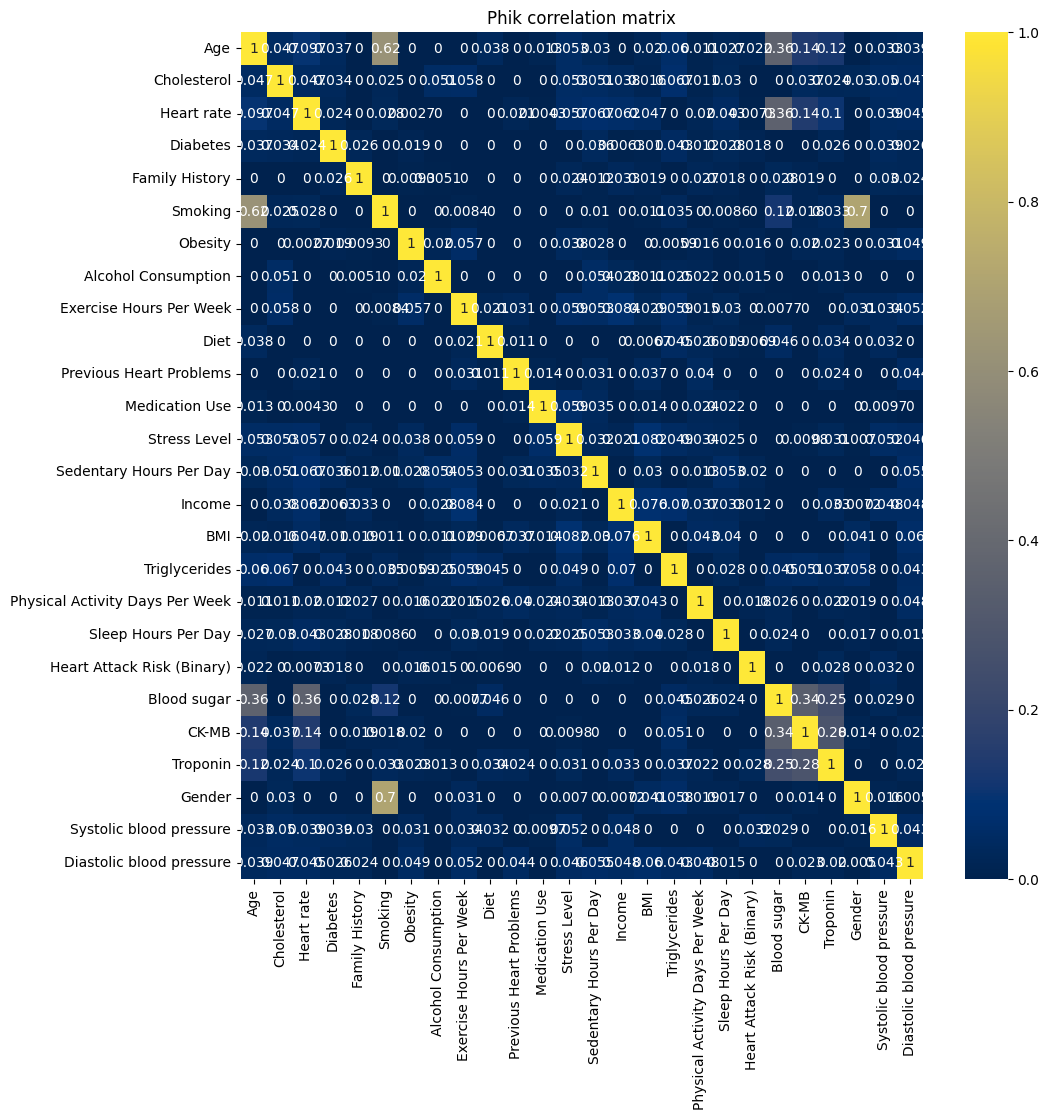

In [31]:
phik_corr = df.drop('id', axis=1).phik_matrix(interval_cols=continuous)
plt.figure(figsize=(11, 11))
sns.heatmap(phik_corr, annot=True, cmap="cividis")
plt.title("Phik correlation matrix")
plt.show()

In [32]:
display(phik_corr)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure
Age,1.000000,0.047296,0.096545,0.037166,0.000000,0.620530,0.000000,0.000000,0.000000,0.037997,...,0.059949,0.010839,0.027290,0.022225,0.359543,0.138603,0.122965,0.000000,0.033469,0.039000
Cholesterol,0.047296,1.000000,0.046766,0.033748,0.000000,0.025223,0.000000,0.051442,0.058412,0.000000,...,0.067432,0.010897,0.030416,0.000000,0.000000,0.037251,0.023634,0.029815,0.050402,0.046545
Heart rate,0.096545,0.046766,1.000000,0.023945,0.000000,0.027918,0.002655,0.000000,0.000000,0.000000,...,0.000000,0.020279,0.043306,0.007342,0.358178,0.141705,0.102284,0.000000,0.039319,0.044680
Diabetes,0.037166,0.033748,0.023945,1.000000,0.025809,0.000000,0.019436,0.000000,0.000000,0.000000,...,0.043154,0.012481,0.027584,0.018324,0.000000,0.000000,0.025830,0.000000,0.038714,0.026201
Family History,0.000000,0.000000,0.000000,0.025809,1.000000,0.000000,0.009305,0.005136,0.000000,0.000000,...,0.000000,0.027124,0.018189,0.000000,0.027865,0.018601,0.000000,0.000000,0.030289,0.024432
Smoking,0.620530,0.025223,0.027918,0.000000,0.000000,1.000000,0.000000,0.000000,0.008420,0.000000,...,0.034906,0.000000,0.008616,0.000000,0.115593,0.017989,0.032929,0.703385,0.000000,0.000000
Obesity,0.000000,0.000000,0.002655,0.019436,0.009305,0.000000,1.000000,0.020462,0.057019,0.000000,...,0.005890,0.016269,0.000000,0.015839,0.000000,0.019953,0.022984,0.000000,0.031370,0.049056
Alcohol Consumption,0.000000,0.051442,0.000000,0.000000,0.005136,0.000000,0.020462,1.000000,0.000000,0.000000,...,0.025038,0.021965,0.000000,0.014553,0.000000,0.000000,0.012937,0.000000,0.000000,0.000000
Exercise Hours Per Week,0.000000,0.058412,0.000000,0.000000,0.000000,0.008420,0.057019,0.000000,1.000000,0.020915,...,0.058767,0.015356,0.029830,0.000000,0.007701,0.000000,0.000000,0.031349,0.034355,0.052272
Diet,0.037997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020915,1.000000,...,0.044896,0.025646,0.018720,0.006872,0.046313,0.000000,0.033751,0.000000,0.031896,0.000000


##### Общие выводы по Phik-корреляционной матрице

- Gender ↔ Smoking ≈ 0.70 — сильная связь, признак отражает гендерное различие в курении

- Age ↔ Smoking ≈ 0.62 — высокая корреляция
  
- В большинстве пар признаков корреляция слабая или близка к нулю.

- Сильных линейных или нелинейных зависимостей между признаками не выявлено. Это говорит об отсутствии выраженной мультиколлинеарности в данных.

- Признаки в целом независимы друг от друга.

__Датасет демонстрирует слабые корреляции с целевой переменной,
что указывает на:__

- нелинейную природу зависимостей,

- пороговые эффекты,

- либо синтетическую генерацию данных.

__Это означает:__

- линейные модели могут работать слабо,

- деревья и бустинги — предпочтительнее,

- корреляция не является критерием отбора признаков.

#### Итоговый вывод по EDA

- __1. Общая характеристика данных__

В ходе анализа был исследован датасет размером **8442 наблюдения и 27 признаков** (__после очистки__).
Целевая переменная — **Heart Attack Risk (Binary)**, бинарная, с умеренным дисбалансом классов (≈36% положительного класса).

Большинство признаков представлены в **нормализованной шкале [0,1]**, что указывает на предварительную обработку данных до этапа моделирования.


- __2. Качество данных и очистка__

* Явных дубликатов не обнаружено.
* Выявлена **системная проблема пропусков** в 243 строках, сопровождающаяся:

  * бинарным кодированием пола (`Gender = '0.0' / '1.0'`),
  * одновременными пропусками в целом блоке медицинских и поведенческих признаков,
  * константными значениями по ряду числовых столбцов.

Данные строки были интерпретированы как **повреждённые или технически некорректные записи** и **удалены**, поскольку их импутация привела бы к генерации искусственных наблюдений.

После удаления пропусков в датасете **не осталось NaN**, что позволяет использовать данные напрямую для обучения моделей.

- __3. Структура и типы признаков__

Признаки были корректно разделены на группы:

* **Бинарные** (Diabetes, Smoking, Obesity и др.) — представлены значениями {0,1}, без ошибок кодирования.
* **Категориальные** — `Gender` (Male/Female), `Diet` (3 категории).
* **Дискретные числовые** — `Stress Level`, `Physical Activity Days Per Week`, `Sleep Hours Per Day`.
* **Непрерывные** — возраст, давление, BMI, биохимические показатели и др.

Большинство признаков демонстрируют **адекватную вариативность**, симметричные распределения и отсутствие аномальных выбросов.

- __4. Особенности отдельных признаков__

    - __Корректные и устойчивые признаки__

        Возраст, холестерин, ЧСС, давление, BMI, триглицериды, физическая активность и сон:

        * распределены равномерно,
        * не содержат экстремальных выбросов,
        * подходят для использования без дополнительной очистки.

    - __Бинарные поведенческие и медицинские признаки__

        В целом корректны, однако:

        * `Smoking` и `Gender` демонстрируют выраженную связь,
        * по некоторым признакам присутствует дисбаланс классов, который следует учитывать при моделировании.

    - __Биохимические маркеры (Blood sugar, CK-MB, Troponin)__

        Выявлены **нетипичные распределения**:

        * сильная концентрация значений в одной точке,
        * совпадение медианы и квартилей,
        * длинные хвосты с редкими экстремальными значениями.

        Это указывает на **ограниченную информативность этих признаков в линейной интерпретации** и возможное наличие пороговых или нелинейных эффектов.
        В исходном виде такие признаки **не рекомендуется использовать в линейных моделях**, но они могут быть полезны для деревьев решений и ансамблей.


- __5. Корреляционный анализ__

Phik-корреляционная матрица показала:

* отсутствие сильной мультиколлинеарности между большинством признаков,
* выраженные связи:

  * `Gender ↔ Smoking`,
  * `Age ↔ Smoking`.

Корреляции с целевой переменной в целом **слабые**, что указывает на:

* нелинейную природу зависимостей,
* возможные пороговые эффекты,
* либо синтетический характер данных.

- __6. Общие выводы__

    - 1. **Данные после очистки являются структурно корректными и пригодными для моделирования.**
    - 2. Импутация пропусков не применялась осознанно, так как пропуски носили технический характер.
    - 3. Корреляция не может использоваться как основной критерий отбора признаков.
    - 4. Линейные модели могут показывать ограниченное качество.
    - 5. **Наиболее предпочтительные модели**:

           * Random Forest,
           * Gradient Boosting (XGBoost / LightGBM / CatBoost),
     так как они способны:
               * учитывать нелинейности,
               * автоматически находить пороги,
               * быть устойчивыми к скошенным распределениям.



#### Выбор моделей для последующего моделирования

Результаты разведочного анализа данных показали, что датасет обладает рядом особенностей, которые напрямую влияют на выбор подходящих моделей машинного обучения:

* большинство признаков имеют **нелинейные или пороговые эффекты**;
* корреляции между признаками и целевой переменной в целом слабые;
* биохимические показатели (Blood Sugar, CK-MB, Troponin) имеют **скошенные распределения с экстремальными значениями**;
* предположения о нормальности распределений в целом **не выполняются**.

В связи с этим при выборе моделей приоритет был отдан алгоритмам, способным эффективно работать с такими данными.

---

- __Дерево-ориентированные модели (предпочтительный выбор)__

* Random Forest
* Gradient Boosting (XGBoost / LightGBM / CatBoost)

__Почему эти модели подходят лучше всего__

Дерево-ориентированные алгоритмы обладают рядом критически важных свойств, соответствующих структуре данных:

- 1. **Автоматический поиск порогов**
       Модели самостоятельно разбивают пространство признаков, что особенно важно для признаков с выраженными пороговыми эффектами (например, Blood Sugar).

- 2. **Устойчивость к выбросам**
       Экстремальные значения (CK-MB, Troponin) не оказывают доминирующего влияния, поскольку решения принимаются на основе локальных разбиений, а не глобальных коэффициентов.

- 3. **Способность моделировать нелинейные зависимости**
       В том числе U-образные и кусочно-линейные эффекты, которые невозможно адекватно описать линейными моделями.

- 4. **Отсутствие требований к распределению признаков**
       Не требуется нормальность, симметричность или линейность, что особенно важно для реальных медицинских данных.

__Практическое следствие__

Для дерево-ориентированных моделей признаки **Blood Sugar, CK-MB и Troponin могут быть использованы в исходном виде**, без ручной трансформации или жёсткой пороговой инженерии.


- __Линейные модели (не рекомендованы без трансформаций)__

Основные ограничения

Линейные модели плохо согласуются с выявленными особенностями данных:

- 1. __Предположение о линейности__
       Большинство признаков не демонстрируют линейной связи с целевой переменной.
- 2. __Чувствительность к выбросам__
       Экстремальные значения биохимических показателей могут доминировать и искажать модель.
- 3. __Неспособность моделировать U-образные зависимости__
       Без ручного добавления нелинейных признаков такие эффекты полностью теряются.

Для линейных моделей **обязательны трансформации** (логарифмирование, бинаризация, пороговая инженерия), иначе их использование приводит к методологически некорректным результатам.


__Итоговый вывод__

С учётом структуры данных, характера распределений и результатов корреляционного анализа, **дерево-ориентированные модели являются наиболее обоснованным и надёжным выбором** для данной задачи. Они позволяют использовать исходные признаки без агрессивной предобработки и лучше отражают сложную природу медицинских факторов риска.

## Обучение и проверка модели

### Подготовка данных

Для корректной работы модели CatBoost категориальные признаки были приведены к строковому типу.

In [33]:
# готовим данные
df['Diet'] = df['Diet'].astype(str)
df['Gender'] = df['Gender'].astype(str)
cat_features = ['Gender', 'Diet']

X = df.drop(['id', 'Heart Attack Risk (Binary)'], axis=1)
y = df['Heart Attack Risk (Binary)']


__Особенности кодирования признаков для дерево-ориентированных моделей__

В рамках данного исследования кодирование признаков было выбрано с учётом используемых моделей:

- Бинарные признаки (Diabetes, Smoking, Obesity и др.) уже представлены в числовом виде {0,1} и не требуют дополнительного кодирования.

- Категориальные признаки (Gender, Diet) могут быть использованы напрямую в моделях, поддерживающих работу с категориальными переменными (например, CatBoost).

- Непрерывные и дискретные числовые признаки используются в исходном виде без нормализации и масштабирования, так как признаки уже приведены к единому масштабу;

Таким образом, для дерево-ориентированных моделей, особенно CatBoost, не требуется применение `One-Hot Encoding` или `Ordinal Encoding` и др., что снижает риск внесения искусственного порядка в данные и упрощает пайплайн обучения.

### Обучение модели CatBoostClassifier

Для обучения была выбрана модель CatBoostClassifier как представитель градиентного бустинга, хорошо подходящий для задач с:

    - нелинейными эффектами,

    - пороговыми зависимостями,

    - смешанными типами данных (числовые + категориальные),

    - несоблюдением нормальности распределений.

Параметры модели:

- iterations=2000, learning_rate=0.03, depth=11 — управляют сложностью и скоростью обучения;

- auto_class_weights='Balanced' — автоматически компенсирует дисбаланс классов;

- early_stopping_rounds=200 — останавливает обучение, если метрика на валидации не улучшается, предотвращая переобучение;

- eval_metric='AUC' — основная метрика качества на валидации.

__Обоснование выбора метрики ROC-AUC__

В качестве основной метрики качества была выбрана **ROC-AUC**, поскольку задача характеризуется дисбалансом классов и требует оценки способности модели выявлять объекты повышенного риска.

ROC-AUC оценивает качество **ранжирования вероятностей**, а не результат при фиксированном пороге классификации, что особенно важно для медицинских задач, где модель используется как инструмент оценки риска. Метрика не зависит от выбора порога и позволяет корректно сравнивать модели и гиперпараметры на этапе обучения.

Дополнительно ROC-AUC учитывает компромисс между долей правильно выявленных рисковых случаев и количеством ложных срабатываний, что делает её методологически обоснованным выбором для данной задачи.

#### Оценка модели с использованием Stratified K-Fold

Для оценки устойчивости и обобщающей способности модели применялась стратифицированная k-fold кросс-валидация (k=5), что позволило:

- сохранить пропорции классов в каждом фолде;

- оценить стабильность качества модели на разных подвыборках;

- избежать зависимости результатов от одного случайного разбиения данных.

In [34]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

auc_scores = []
f1_scores = []
best_thresholds = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.03,
        depth=8,
        eval_metric='AUC',
        random_seed=RANDOM_STATE,
        verbose=0,
        auto_class_weights='Balanced',
        early_stopping_rounds=200
    )

    model.fit(
        X_train, y_train,
        cat_features=cat_features,
        eval_set=(X_val, y_val),
        use_best_model=True
    )

    proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, proba)

    thresholds_range = np.linspace(0.05, 0.95, 50)
    f1s = [f1_score(y_val, (proba >= t).astype(int)) for t in thresholds_range]
    best_t = thresholds_range[int(np.argmax(f1s))]

    pred = (proba >= best_t).astype(int)
    f1 = max(f1s)

    auc_scores.append(auc)
    f1_scores.append(f1)
    best_thresholds.append(best_t)

    print(f"Fold {fold}: AUC={auc:.3f}, F1={f1:.3f},  best_threshold = {best_t:.3f}")

print("\nMean AUC:", np.mean(auc_scores), "Std:", np.std(auc_scores))
print("Mean F1:", np.mean(f1_scores), "Std:", np.std(f1_scores))
print("Mean best threshold:", np.mean(best_thresholds), "Std:", np.std(best_thresholds))

Fold 1: AUC=0.567, F1=0.532,  best_threshold = 0.417
Fold 2: AUC=0.543, F1=0.529,  best_threshold = 0.491
Fold 3: AUC=0.564, F1=0.531,  best_threshold = 0.307
Fold 4: AUC=0.562, F1=0.531,  best_threshold = 0.234
Fold 5: AUC=0.574, F1=0.535,  best_threshold = 0.362

Mean AUC: 0.5620500345380559 Std: 0.010227663047583794
Mean F1: 0.5317725621979514 Std: 0.001913352807552236
Mean best threshold: 0.36224489795918363 Std: 0.08846885812990257


__Средние значения:__

- Mean ROC-AUC ≈ 0.56, Std ≈ 0.01

- Mean F1 ≈ 0.53, Std ≈ 0.002

- Mean best threshold ≈ 0.36, Std ≈ 0.088


Малые значения стандартных отклонений указывают на устойчивость модели и стабильность качества.

Оптимальный порог классификации, максимизирующий F1-score, варьируется между фолдами, что отражает чувствительность метрики к распределению вероятностей. В качестве итогового порога классификации был выбран агрегированный порог:

- Mean best threshold ≈ 0.36

Он обеспечивает компромисс между полнотой и точностью выявления пациентов с высоким риском.

#### Финальное обучение

После подтверждения стабильности модели был выполнен финальный train-test split с сохранением пропорций классов. Модель обучалась на тренировочной выборке и оценивалась на отложенном тесте.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['id', 'Heart Attack Risk (Binary)'], axis=1),
    df['Heart Attack Risk (Binary)'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Heart Attack Risk (Binary)'])

print("Размерности выборок:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Размерности выборок:
X_train: (6331, 25)
X_test: (2111, 25)
y_train: (6331,)
y_test: (2111,)


In [36]:
cb_model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.03,
    depth=11,
    eval_metric='AUC',
    random_seed=RANDOM_STATE,
    verbose=200,
    auto_class_weights='Balanced',
    early_stopping_rounds=200
)
# Fit
cb_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    use_best_model=True
)

0:	test: 0.5251327	best: 0.5251327 (0)	total: 233ms	remaining: 7m 45s
200:	test: 0.5860710	best: 0.5862079 (199)	total: 34.8s	remaining: 5m 11s
400:	test: 0.5848926	best: 0.5865766 (216)	total: 1m 12s	remaining: 4m 49s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.5865766194
bestIteration = 216

Shrink model to first 217 iterations.


__Лучшая AUC на тесте ≈ 0.59__

Это означает, что модель различает классы лучше случайного угадывания (0.5), но качество пока умеренное.

#### ROC curve

ROC-кривая

ROC-кривая показывает компромисс между:

TPR (Recall) — доля найденных “1”,

FPR — доля ложных тревог среди “0”.

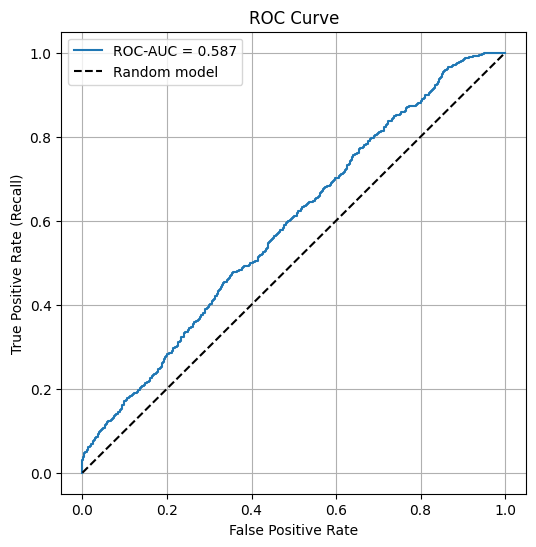

In [37]:
# ROC curve
proba = cb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random model")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

#### F1 значение

Для финальной модели был использован порог, полученный на этапе кросс-валидации.

In [38]:
pred = (proba >= np.mean(best_thresholds)).astype(int)

print("Best threshold:", np.mean(best_thresholds))
print("F1:", max(f1s))

Best threshold: 0.36224489795918363
F1: 0.5350749879051766


__Результат:__

    - F1 (для класса 1) ≈ 0.54

__Что означает оптимизация F1__

F1 — баланс precision и recall по классу 1.
При таком подборе порога модель начинает “сильнее защищать” класс 1 (не пропускать риск), даже если при этом растёт число ложных тревог.

Это допустимо, так как наша цель: 

Лучше лишний раз предупредить о риске, чем пропустить пациента с высоким риском.

#### Classification report и Confusion Matrix

In [39]:
print(classification_report(y_test, pred))
print("Confusion matrix:\n", confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.75      0.28      0.41      1358
         1.0       0.39      0.83      0.53       753

    accuracy                           0.48      2111
   macro avg       0.57      0.55      0.47      2111
weighted avg       0.62      0.48      0.45      2111

Confusion matrix:
 [[379 979]
 [128 625]]


__Вывод по метрикам__

Наш порог под F1 действительно показывает способность находить класс 1 (риск), при этом также сделал модель “тревожной” — она выдаёт много ложных срабатываний.

Оптимизация F1 приводит к стратегии, при которой модель предпочитает не пропускать пациентов с высоким риском, даже ценой увеличения числа ложных тревог. В контексте медицинской задачи такая стратегия является оправданной.

#### Анализ важности признаков (CatBoost)

In [40]:
cb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,BMI,6.818368
1,Systolic blood pressure,6.780396
2,Cholesterol,6.673463
3,Sedentary Hours Per Day,6.661196
4,Heart rate,6.632672
5,Triglycerides,6.583891
6,Sleep Hours Per Day,6.488686
7,Stress Level,6.257707
8,Income,6.211900
9,Age,6.111825


**Краткие выводы по важности признаков (CatBoost):**

* **Наибольший вклад** в модель вносят **физиологические и поведенческие непрерывные признаки**: BMI, артериальное давление, холестерин, ЧСС, триглицериды, уровень активности и сна. Их важности находятся в близком диапазоне, что указывает на **распределённый, а не доминирующий вклад одного фактора**.

* **Возраст и показатели образа жизни** (сидячее время, физическая активность, стресс) также входят в группу ключевых предикторов, подтверждая **мультифакторную природу сердечно-сосудистого риска**.

* **Классические бинарные медицинские факторы** (диабет, семейный анамнез, ожирение, приём медикаментов) имеют **умеренный вклад**, уступая по информативности непрерывным измерениям.

* **Биохимические маркеры** (CK-MB, Troponin, Blood sugar) показали **низкую важность**, что согласуется с их скошенными распределениями и возможными пороговыми эффектами.

* **Категориальные признаки** (Gender, Diet, Smoking) имеют **минимальный вклад**, что указывает на их второстепенную роль в данной модели по сравнению с физиологическими показателями.

**Общий вывод:** модель опирается прежде всего на **комбинацию непрерывных клинических и поведенческих признаков**, а не на отдельные бинарные или демографические факторы, что подтверждает целесообразность использования дерево-ориентированных методов.


### Итоговые выводы по моделированию

* Модель **CatBoostClassifier** обучена корректно; использование early stopping позволило эффективно контролировать переобучение.

* Результаты **Stratified K-Fold кросс-валидации** демонстрируют устойчивость модели и низкую вариативность метрик, что подтверждает стабильность выбранной конфигурации.

* Значение **ROC-AUC ≈ 0.59** указывает на умеренную способность модели различать классы.

* Оптимизация порога по F1-score позволяет почти не пропускать пациентов с высоким риском, но приводит к росту ложноположительных срабатываний.

* Полученный оптимальный порог (**≈ 0.36**) соответствует стратегии минимизации пропуска пациентов с высоким риском даже ценой увеличения числа ложных тревог, что допустимо в контексте медицинской задачи.

* Анализ важности признаков показывает, что модель в основном опирается на **непрерывные клинические и поведенческие показатели**, что подтверждает целесообразность применения дерево-ориентированных методов для данной задачи.

---


## Дополнительно: Логика применения модели в приложении

Данный раздел описывает логику применения обученной модели
в прикладном приложении и особенности обработки некорректных
наблюдений на этапе предсказания.

### Логика применения модели и обработка пропусков

Скрипт проверки качества предсказаний требует наличия результата **для каждого `id`** тестовой выборки, включая строки с пропущенными значениями. 

При этом обученная модель корректно работает только на полностью заполненных данных, а импутация пропусков в медицинских признаках является методологически некорректной.

В связи с этим на этапе применения модели используется следующая логика:

* для строк **без пропусков** выполняется стандартное предсказание модели;
* для строк **с пропусками** применяется fallback-стратегия с присвоением значения `prediction = 0`;
* предсказание формируется **для всех `id`**, что обеспечивает соответствие требованиям проверочного скрипта;
* идентификаторы строк, для которых было применено fallback-правило, **сохраняются в отдельный файл** для прозрачности и последующего анализа.

Проведённый ниже end-to-end эксперимент показал, что использование fallback-стратегии не приводит к существенной деградации метрик качества (F1-score ≈ 0.53) по сравнению с результатами на очищенной выборке.

__Берём raw-датасет и вытаскиваем строки с NaN__

In [45]:
df_raw = pd.read_csv("../data/heart_train.csv")

df_raw = df_raw.drop(columns=["Unnamed: 0"], errors="ignore")

X_raw = df_raw.drop(columns=["id", "Heart Attack Risk (Binary)"])
y_raw = df_raw["Heart Attack Risk (Binary)"]

# категории — как в модели
X_raw["Gender"] = X_raw["Gender"].astype(str)
X_raw["Diet"] = X_raw["Diet"].astype(str)

# строки с NaN 
nan_mask = X_raw.isna().any(axis=1)

X_nan = X_raw.loc[nan_mask]
y_nan = y_raw.loc[nan_mask]

print("NaN rows:", len(X_nan))

NaN rows: 243


__Объединяем X_test + NaN-строки__

In [47]:
X_test_ext = pd.concat([X_test, X_nan], axis=0)
y_test_ext = pd.concat([y_test, y_nan], axis=0)

print("X_test clean:", len(X_test))
print("X_test + NaN:", len(X_test_ext))

X_test clean: 2111
X_test + NaN: 2354


__Предсказание: clean → модель, NaN → fallback=0__

In [48]:
# маска чистых строк
clean_mask = ~X_test_ext.isna().any(axis=1)

# инициализация fallback=0
proba_full = np.zeros(len(X_test_ext))

# модель — ТОЛЬКО для clean
proba_clean = cb_model.predict_proba(
    X_test_ext.loc[clean_mask]
)[:, 1]

proba_full[clean_mask.values] = proba_clean

threshold = float(np.mean(best_thresholds))
pred_full = (proba_full >= threshold).astype(int)

print("F1 (end-to-end, fallback=0):", f1_score(y_test_ext, pred_full))
print(classification_report(y_test_ext, pred_full))
print("Confusion matrix:\n", confusion_matrix(y_test_ext, pred_full))

F1 (end-to-end, fallback=0): 0.5303351718285957
              precision    recall  f1-score   support

         0.0       0.83      0.39      0.53      1601
         1.0       0.39      0.83      0.53       753

    accuracy                           0.53      2354
   macro avg       0.61      0.61      0.53      2354
weighted avg       0.69      0.53      0.53      2354

Confusion matrix:
 [[622 979]
 [128 625]]


__Проведённый end-to-end эксперимент показал, что использование fallback-стратегии не приводит к существенной деградации метрик качества (F1-score ≈ 0.53) по сравнению с результатами на очищенной выборке.__

- Модель обучается и валидируется только на корректных данных.
- Для записей с пропущенными значениями используется deterministic fallback-правило (prediction = 0).
- End-to-end метрики рассчитаны с учётом этого правила, что соответствует production-поведению системы

__Таким образом, выбранная логика обеспечивает корректную и воспроизводимую работу модели в условиях реальных данных и соответствует требованиям тестирующего пайплайна.__